In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

In [ ]:
from typing import List, Optional
from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings("ignore")
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


from qiskit_aer import AerSimulator
backend =  AerSimulator(method='statevector')

# Problema de Deutsch-Jozsa

Dado un oráculo de $n$ bits,, i.e. una caja negra, no sabemos exactamente qué hay dentro, pero sabemos que es constante (es decir, siempre devuelve 0 o 1 cuando se la consulta) o equilibrada (es decir, la mitad de las veces devuelve 0 y el resto devuelve 1).

El **objetivo** es determinar si ese oráculo es constante o equilibrado con un mínimo de consultas.

Clásciamente, necesitamos realizar consultas al menos dos veces para resolver este problema. Si obtenemos el mismo resultado dos veces, no podemos concluir y necesitamos volver a preguntar, hasta $N/2 + 1$ consultas, donde $N = 2^n$ es el número de todas las cadenas de bits realizables a partir de la entrada de $n$ bits del oráculo.

Sin embargo, este problema se resuelve con una solución cuántica: el algoritmo de Deutsch-Jozsa, donde solo necesitamos **UNA única consulta** al oráculo para saber exactamente si es constante o equilibrada.

**El algoritmo de Deutsch-Jozsa**


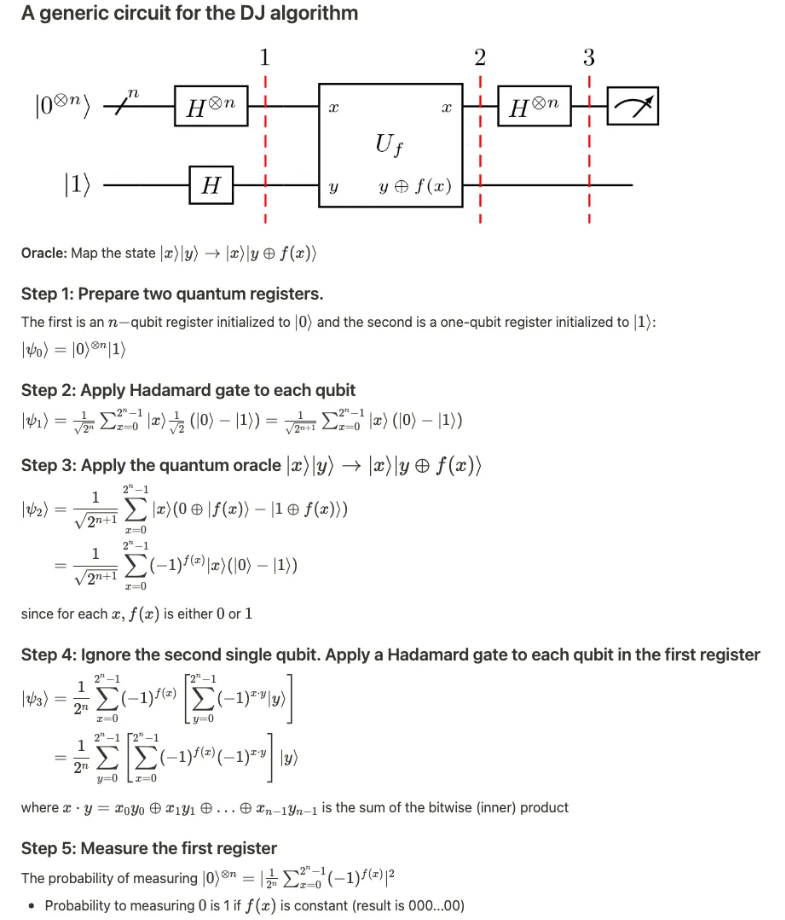

## Oráculo constante

Para el oráculo constante, podemos aplicar la compuerta $\hat X$ o la compuerta $\hat I$ al qubit final (que se utiliza para generar el resultado 0 o 1 del oráculo). Si utilizamos la compuerta $\hat X$, el oráculo siempre devolverá 1, y si utilizamos la compuerta $\hat I$, siempre devolverá 0.

In [ ]:
# constante igual a 1

def const_oracle(n):
  qc = QuantumCircuit(n)
  qc.x(n-1)
  qc.barrier()
  return qc

Inicializamos el circuito

In [ ]:
def circ_init(n):
  qc = QuantumCircuit(n)
  for qubit in range(n-1):
    qc.h(qubit)
  return qc

In [ ]:
dj_circuit = QuantumCircuit(n)
dj_circuit = circ_init(n)
dj_circuit.x(n-1)
dj_circuit.h(n-1)
dj_circuit.barrier()
dj_circuit.draw('mpl')

Aplicamos el oráculo

In [ ]:
dj_circuit = dj_circuit.compose(const_oracle(n))
dj_circuit.draw('mpl')

Aplicamos nuevamente las compuertas de Hadamard y medimos los $n$ registros

In [ ]:
dj_circuit = dj_circuit.compose(circ_init(n))

dj_circuit.add_register(ClassicalRegister(n))

for qubit in range(n-1):
  dj_circuit.measure(qubit,qubit)
dj_circuit.draw('mpl')

Simulamos el circuito

In [ ]:
shots = 1024
counts = backend.run(dj_circuit, shots=shots).result().get_counts()
plot_histogram(counts)

Ejecutamos en computadora cuántica

In [ ]:
#!pip install qiskit-ibm-runtime

#from qiskit_ibm_runtime import QiskitRuntimeService
#ibm_quantum_service = QiskitRuntimeService(channel="ibm_quantum", token="")
#from qiskit import QuantumCircuit
#from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
#from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

#backend = ibm_quantum_service.least_busy(operational=True, simulator=False)
#pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
#isa_circuit = pm.run(dj_circuit)

#sampler = Sampler(mode=backend)
#sampler.options.default_shots = 4096
#job = sampler.run([isa_circuit])
#print(f"Job ID is {job.job_id()}")
#pub_result = job.result()[0]

#plot_histogram(pub_result.data.meas.get_counts())

## Deutsch-Jozsa con oaráculo balanceado

### Ejercicio 1: implemente un oráculo balanceado

In [ ]:
# la entrada de la función es el número de qubits y la salida el
# circuito correspondiente a un oráculo balanceado

def balanced_oracle(n):

  return qc

### Ejercicio 2: muestre que su oráculo efectivamente representa a una función balanceada

Inicializamos el circuito

In [ ]:
dj_circuit = QuantumCircuit(n)
dj_circuit = circ_init(n)
dj_circuit.x(n-1)
dj_circuit.h(n-1)
dj_circuit.barrier()
dj_circuit.draw('mpl')

Aplicamos el oráculo balanceado

In [ ]:
dj_circuit = dj_circuit.compose(balanced_oracle(n))
dj_circuit.draw('mpl')

Añadimos la última parte del circuito

In [ ]:
dj_circuit.barrier()

dj_circuit = dj_circuit.compose(circ_init(n))
dj_circuit.add_register(ClassicalRegister(n))

for qubit in range(n-1):
  dj_circuit.measure(qubit,qubit)
dj_circuit.draw('mpl')

Hacemos la simulación correspondiente

In [ ]:
shots = 1024
counts = backend.run(dj_circuit, shots=shots).result().get_counts()
plot_histogram(counts)